<a href="https://colab.research.google.com/github/jx-dohwan/-Deep_Learning_from_Scratch_2_study/blob/main/CH3_Word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH3_Word2vec
> 추론 기반 기법이다. 이 추론 과정에서 신경망을 이용하는데, 여기서 그 유명한 Word2vec가 등장한다.

## 1. 추론 기반 기법과 신경망
> 단어를 벡터로 표현하는 방법중 성공적인 기법은 크게 통계 기반 기법과 추론 기반 기법 두개로 나눌수 있다. 단어의 의미를얻는 방식은 서로 크게 다르지만 그 배경에는 모두 분포 가설이 있다.

### 1) 통계 기반 기법의 문제점
> 대규모 말뭉치를 다룰 때 문제가 발생한다. 이런 거대한 행렬에 SVD를 적용하는 일은 현실적이지가 않다. <br><br> 통계 기반 기법은 말뭉치 전체의 통계를 이용해 단 1회의 처리만에 단어의 분산 표현을 얻는다. 한편, 추론 기반 기법에서는, 예컨대 신경망을 이용하는 경우는 미니배치로 학습하는 것이 일반적이다. 미니배치 학습에서는 신경망이 한 번에 소량의 학습 샘플을 반복해서 학습하며 가중치를 갱신해간다.

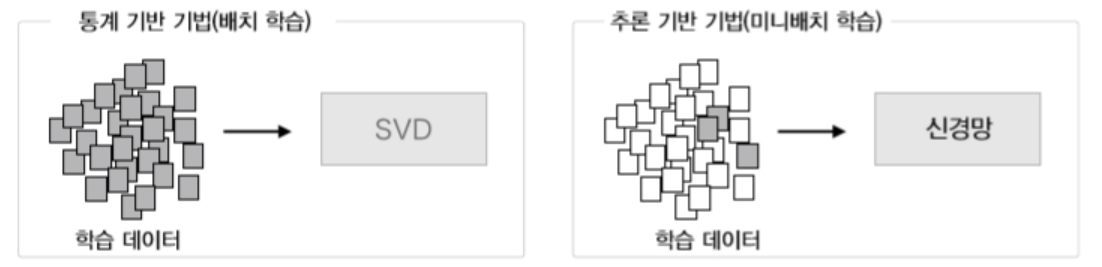

- 추론 기반의 장점
  - 데이터를 작게 나눠 학습하기 때문에 계산량이 큰 작업을 비교적 쉽게 처리할 수 있다.
  - 여러 머신과 여러 GPU를 이용한 병렬 계산도 가능해져서 학습 속도를 높일 수 있다.

### 2) 추론 기반 기법 개요
> 추론 기반 기법에서는 당연히 추론이 주된 작업이다. 주변 단어가 주어졌을 때 빈 곳에 무슨 단어가 들어갈지 추측하는 작업니다. 

### 3) 신경망에서의 단어 처리
> 신경망을 이용해서 단어를 처리하는데 그대로 처리할 수 없으니 단어를 고정 길이의 벡터로 변환해야 한다. 이 때 사용하는 대표적인 방법이 원핫인코딩이다. 원핫 표현이란 벡터의 원소 중 하나만 1이고 나머지는 모두 0인 벡터를 말한다. 


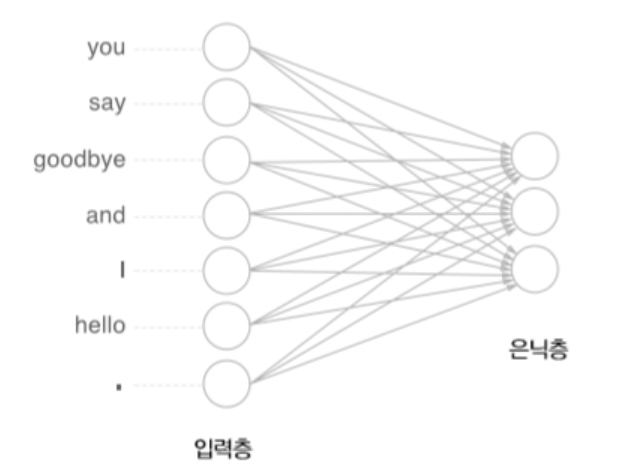

In [1]:
import numpy as np

c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7,3)
h = np.matmul(c,W)
print(h)

[[-0.09090284  0.21484319  0.63677919]]


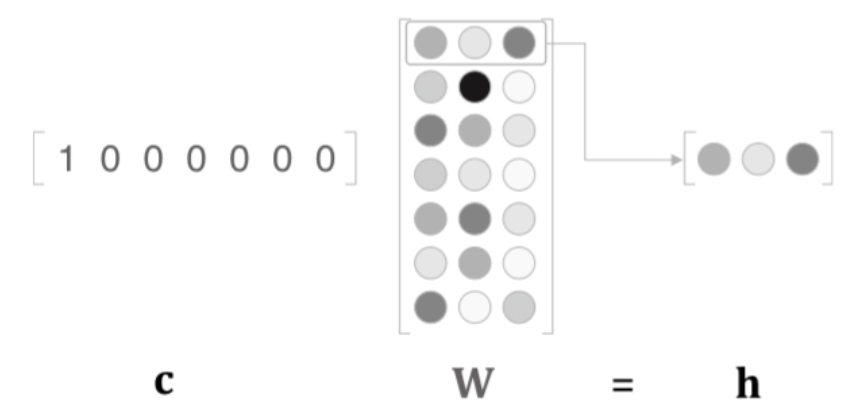

In [2]:
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥2/")
import numpy as np
from common.layers import MatMul

c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7,3)
layer = MatMul(W)
h = layer.forward(c)
print(h)

[[-1.39169561 -0.40029606 -0.21831619]]


## 2.단순한 Word2vec
> 앞에서 추론 기반 기법과 신경망으로 단어를 처리하는 방법을 배웠다. 이제 word2vec를 구현할 차례이다. 이번절에서 사용할 신경망은 word2vec에서 제안하는 CBOW(continuous bag-of-words)모델이다.

### 1) CBOW 모델의 추론 처리 
> CBOW 모델은 맥락으로부터 타깃을 추축하는 용도의 신경망이다. 

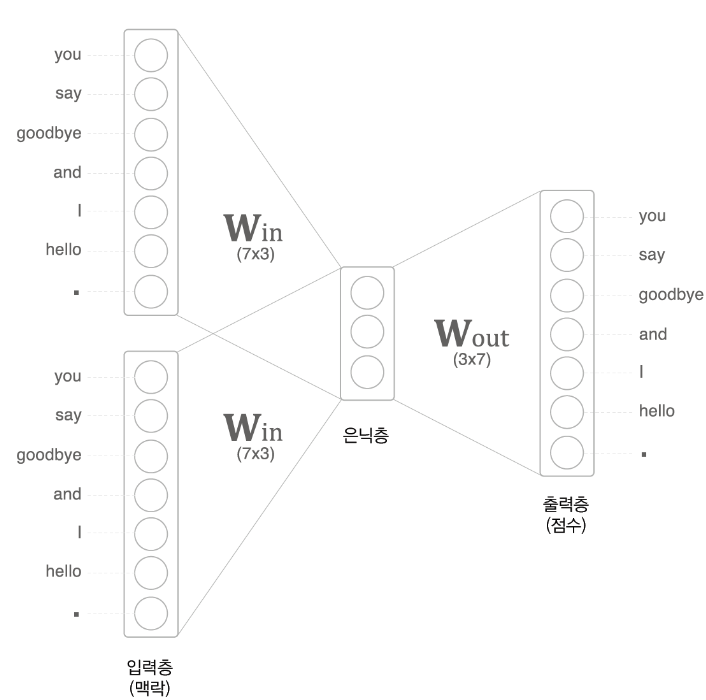

- 입력층이 2개 있고, 은닉층을 거쳐 출력층에 도달한다.
- 두 입력층에서 은직층으로의 변환은 똑같은 완전연결계층이 처리한다
- 그리고 은닉층에서 출력층 뉴런으로의 변환은 다른 완전연결계층이 처리한다.
- 은닉층에 주목
  - 은닉층의 뉴런은 입력층의 완전연결계층에 의해 변환된 값이 된다.
  - 입력층이 여러개면 전체를 평균하면된다.
  - 즉, 은닉층의 뉴런은 1/2(h1+h2)가 되는 것이다.
- 출력층에 주목
  - 출력층은 총 7개이다. 
  - 이 뉴런 하나하나가 각각의 단어에 대응한다.
  - 출력층 뉴런은 각 단어의 점수를 뜻하며
  - 값이 높을수록 대응 단어의 출현 확률도 높아진다.
  - 여기에서 점수란 확률로 해석되기 전의 값이고, 이 점수에 소프트맥스 함수를 적용해서 확률을 얻을 수 있다.

> 입력층이 2개인 이유는 맥락으로 고려할 단어를 2개로 정했기 때문이다. 맥락에 포함시킬 단어가 N개라면 입력층오 N개이다.<br><br> 점수를 Softmax계층에 통한시킨 후의 뉴런을 출력층이라고 한다.

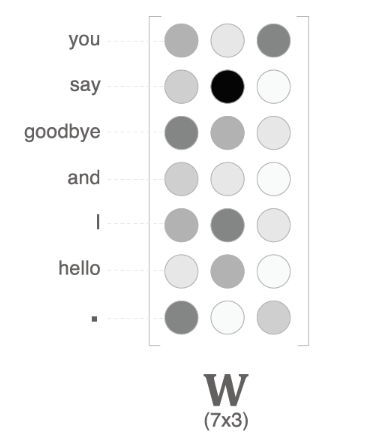

- 가중치 Win은 7X3행렬이며 이 가중치가 바로 단어의 분산 표현의 정체이다.
- 가중치 Win의 각 행에는 해당 단어의 분산 표현이 담겨 있다고 볼 수 있다.
- 따라서 학습을 진행할수록 맥락에서 출현하는 단어를 잘 추측하는 방향으로 이 분산 표현들이 갱신된다.
- 이렇게 얻은 벡터에는 단어의 의미도 잘 녹아있다. 

계층 관점

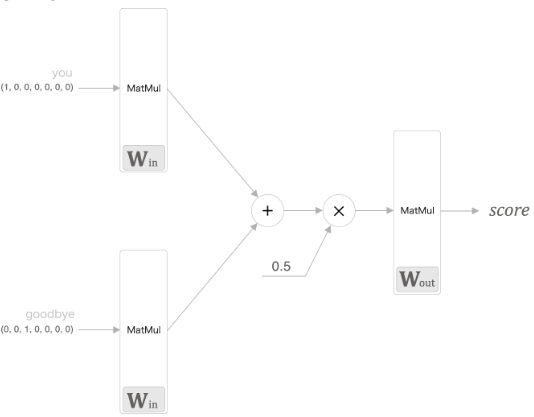

- 2개의 MatMul 계층이 있다.
- 이어서 이 두 계층의 출력이 더해진다.
- 더해진 값애 0.5를 곱해 평균이 되며
- 이 평균이 은닉층 뉴런이 된다. 
- 마지막으로 은닉층 뉴런에 또 다른 MatMul 계층이 적용되어 점수가 출력된다.

In [3]:
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥2/")
import numpy as np
from common.layers import MatMul

# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(s)

[[ 4.10782653  5.06610407  0.2334433   0.14789064 -0.09297976  0.69071157
  -2.1712505 ]]


### 2) CBOW 모델의 학습
> 지금까지 CBOW모델은 출력층에서 각 단어의 점수를 출력했다. 이 점수에 소프트맥스 함수를 적용하면 '확률'을 얻을 수 있다. 이 확률은 맥락이 주어졌을 때 그 중앙에 어떤 단어가 출현하는지를 나타낸다.<br><br> CBOW모델의 학습에서는 올바른 예측을 할 수 있도록 가중치를 조정하는 일을 한다. 그 결과로 가중치 Win(정확히는 in, out 모두)에 단어의 출현 패턴을 파악한 벡터가 학습된다.<br><br> 여기서는 소프트맥스 함수를 이용해 점수를 확률로 변환하고, 그 확률과 정답 레이블로부터 교차 엔트로피 오차를 구한 후, 값을 손실로 사용해서 학습을 진행한다.

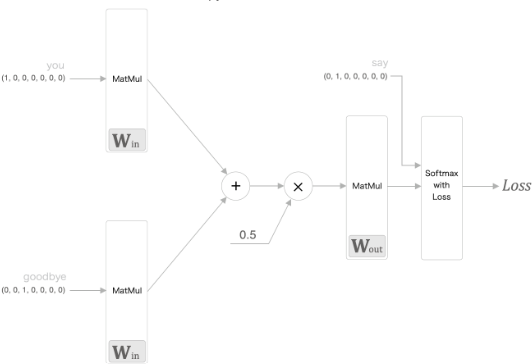

### 3) Word2vec의 가중치와 분산 표현
- word2vec에서 사용되는 신경망의 두가지 가중치
  - 입력 측 완전연결계층의 가중치(Win)
    - 각 행이 각 단어의 분산 표현에 해당
  - 출력 측 완전연결계층의 가중치(Wout)
    - 단어의 의미가 인코딩된 벡터가 저정되고 있다.
    - 출력측 가중치는 각 단어의 분산 표현이 열방향으로 저장된다.
- 최종적으로 이용하는 단어의 분산표현
  - 1. 입력 측의 가중치만 이용
  - 2. 출력 측의 가중치만 이용
  - 3. 양쪽 가중치 모두를 이용

> word2vec에서는 1. 입력 측의 가중치만 이용하는 안이 가장 대중적인 선택이다.

## 3. 학습 데이터 준비

### 1) 맥락과 타깃
> word2vec에서 이용하는 신경망의 입력은 '맥락'이다. 그리고 그 정답 레이블은 맥락에 둘러싸인 중앙의 단어, 즉 '타깃'이다. 다시 말해 우리가 해야할 일은 신경망에 '맥락'을 입력했을 때 '타깃'이 출현할 확률을 높이는 것이다.

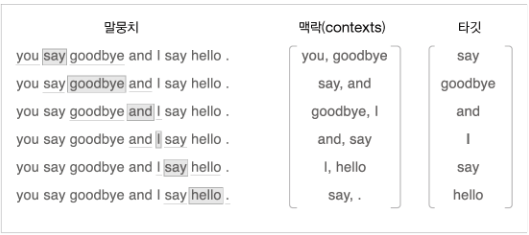

In [4]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


맥락과 타깃을 만드는 함수 구현

In [5]:
def create_contexts_target(corpus, window_size=1):
  target = corpus[window_size:-window_size]
  contexts = []

  for idx in range(window_size, len(corpus)-window_size):
    cs = []
    for t in range(-window_size, window_size+1):
      if t == 0:
        continue
      cs.append(corpus[idx+t])
    contexts.append(cs)
  return np.array(contexts), np.array(target)

In [6]:
contexts, target = create_contexts_target(corpus, window_size=1)
print(contexts)
print

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]


<function print>

### 3) 원핫 표현으로 변환

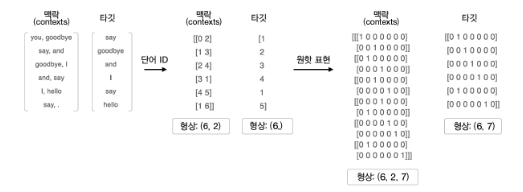

In [7]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

## 4. CBOW 모델 구현

In [8]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
  def __init__(self, vocab_size, hidden_size): # 어휘수와 은닉층의 뉴런수를 받는다.
    V, H = vocab_size, hidden_size

    # 가중치 초기화/각각 작은 부작위 값으로 초기화
    W_in = 0.01 * np.random.randn(V, H).astype('f')#32비트 부동소수점 수로 초기화
    W_out = 0.01 * np.random.randn(H, V).astype('f')

    # 계층 생성
    self.in_layer0 = MatMul(W_in)
    self.in_layer1 = MatMul(W_in)
    self.out_layer = MatMul(W_out)
    self.loss_layer = SoftmaxWithLoss()

    # 모든 가중치와 기울기를 리스트에 모은다.
    layers = [self.in_layer0, self.in_layer1, self.out_layer]
    self.params, self.grads = [],[]
    for layer in layers:
      self.params += layer.params
      self.grads += layer.grads
    
    # 인스턴스 변수에 단어의 분산 표현을 저장
    self.word_vecs = W_in

In [9]:
def forward(self, contexts, target):
  h0 = self.in_layer0.forward(contexts[:,0])
  h1 = self.in_layer1.forward(contexts[:,1])
  h = (h0+h1) * 0.5
  score = self.out_layer.forward(h)
  loss = self.loss_layer.forward(score, target)
  return loss

역전파 구현

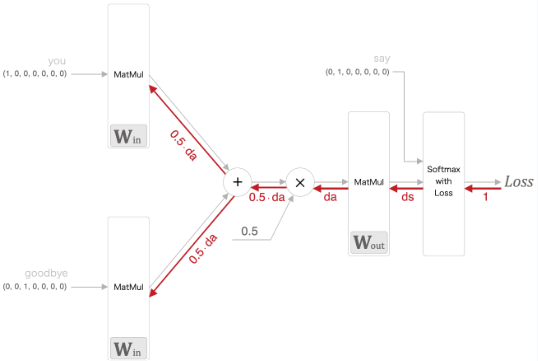

- X의 경우 순전파 시의 입력을 서로 바꿔 기울기에 곱한다. 
- +의 경우 역전파는 기울기를 그대로 통과한다.

In [10]:
def backward(self, dout=1):
  ds = self.loss_layer.backward(dout)
  da = self.out_layer.backward(ds)
  da *= 0.5
  self.in_layer1.backward(da)
  self.in_layer0.backward(da)
  return None

### 1) 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

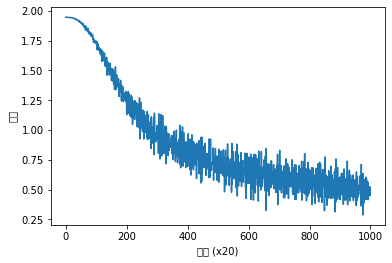

In [11]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()


In [12]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-0.9355609 -1.5402869  0.9504694  0.9828197  1.298673 ]
say [ 1.2686044  -1.2676991  -1.2680663  -0.7416275   0.01987418]
goodbye [-1.134408   -0.27006954  1.1790901   0.8012444   0.3182947 ]
and [ 0.7673901  -1.2472384  -0.82691485 -1.5256019  -1.6067963 ]
i [-1.1544371  -0.2602769   1.2141242   0.8203251   0.34051245]
hello [-0.922555  -1.5449487  0.9373217  0.9804134  1.2732693]
. [ 1.2554587 -0.5862245 -1.2443274  1.6600401  1.4272747]


## 5. word2vec 보충
> 확률관점에서 다시 살펴보겠다.

일단 생략